In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use = 'fivethirtyeight'

In [2]:
# create df of lacplace pdf's from list of dicts
# format is    [{                                            }, ]
def binomial_pdf(list):
    ret = pd.DataFrame()
    for i in range(len(list)):      
        ret[list[i]['name']] = np.random.binomial(list[i]['n'], list[i]['p'], list[i]['size'])   
    return ret

In [3]:
# create df of gamma pdf's from list of dicts
# format is    [{   }, ]  

def gamma_pdf(list):
    ret = pd.DataFrame()
    for i in range(len(list)):      
        ret[list[i]['name']] = np.random.gamma(list[i]['shape'], list[i]['scale'], list[i]['size'])  
    return ret

In [4]:
# create df of lacplace pdf's from list of dicts
# format is    [{   }, ]  

def laplace_pdf(list):
    ret = pd.DataFrame()
    for i in range(len(list)):      
        ret[list[i]['name']] = np.random.laplace(loc=0.0, scale=1.0, size=10000)  
    return ret

In [5]:
def print_binomial_stats(list):
    for i in range(len(list)):
        mean = np.round(list[i]['n'] * list[i]['p'], 4)
        std = np.round((mean * (1 - list[i]['p']))**.5, 4)
        print('for a binomial diststribution with p = '+ str(list[i]['p']) + ' and n = ' + str(list[i]['n']))
        print(' >>> mean is ' + str(mean))
        print(' >>> standard deviation is ' + str(std))


In [6]:
def print_sample_stats(df):
    for label in df.columns.tolist():
        mean = np.round(np.mean(df[label]), 4)
        std = np.round(np.std(df[label], ddof=1), 4)
        print('for sample of ' + label + ' : ')
        print(' >>> mean is ' + str(mean))
        print(' >>> standard deviation is ' + str(std))

In [7]:
# take samples with replacement from df and return new df with samples n =number of samples

def samples_from_df(df,n):
    ret = pd.DataFrame()
    for i in range(len(df.columns)):
        ret[df.columns[i]] =np.random.choice(getattr(df, df.columns[i]), n, replace=True)
        
    return ret 

In [8]:
# this function plots twp overlapping histogram for laplace distributions
# returns figure() of histograms, also plots in jupiter notebook

def two_laplace_hists(df):
    wdth = 12; hght = 8;     
    fig = plt.figure(1, (wdth, hght) )                 
    col1, col2 = df.columns.tolist()
    ymin = 0
    xmin = -10
    xmax = 10
    ymax = 20
    nbins = 40

    plt.axis([xmin, xmax, ymin, ymax])
    plt.hist(df[col1], bins=nbins, alpha=0.5, label=col1)
    plt.hist(df[col2], bins=nbins, alpha=0.5, label=col2)
    plt.legend(loc='upper right') 

        
    return fig

In [9]:
# this function plots twp overlapping histogram for laplace distributions
# returns figure() of histograms, also plots in jupiter notebook

def two_gamma_hists(df):
    wdth = 12; hght = 8;     
    fig = plt.figure(1, (wdth, hght) )                 
    col1, col2 = df.columns.tolist()
    xmin = ymin = 0
    xmax = int(np.round(max([df[col1].max(), df[col2].max()]), 0))
    ymax = int(df[col1].count() / 5)
    nbins = xmax * 2 

    plt.axis([xmin, xmax, ymin, ymax])
    plt.hist(df[col1], bins=nbins, alpha=0.5, label=col1)
    plt.hist(df[col2], bins=nbins, alpha=0.5, label=col2)
    plt.legend(loc='upper right') 

        
    return fig

In [10]:
# this function plots twp overlapping histogram for binomial distributions
# returns figure() of histograms 

def two_binomial_hists(df):
    wdth = 12; hght = 8;  # give   
    fig = plt.figure(1, (wdth, hght) )                 
    col1, col2 = df.columns.tolist()
    xmin = ymin = 0
    xmax = max([df[col1].max(), df[col2].max()]) + 1
    ymax = max(int(df[col1].count() / (df[col1].std() * 2)), int(df[col2].count() / (df[col2].std() * 2)))
    nbins = np.arange(xmax + 1)

    plt.axis([xmin, xmax, ymin, ymax])
    plt.hist(df[col1], bins=nbins, alpha=0.5, label='Population 1')
    plt.hist(df[col2], bins=nbins, alpha=0.5, label='Population 2')
    plt.legend(loc='upper right') 

        
    return fig

# DRILL - Exploring the Central Limit Theorem

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook from the previous assignment, reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. 



In [11]:
# this is the 'given' per the task above
# format is    [{                                            },      ]      
my_binomials = [{'name':'pop1', 'n':10, 'p':0.2, 'size':10000},
                {'name':'pop2', 'n':10, 'p':0.5, 'size':10000}
               ]
               
print(my_binomials)


[{'name': 'pop1', 'n': 10, 'p': 0.2, 'size': 10000}, {'name': 'pop2', 'n': 10, 'p': 0.5, 'size': 10000}]


In [12]:
populations = binomial_pdf(my_binomials)
print(populations.describe())

               pop1          pop2
count  10000.000000  10000.000000
mean       1.985100      5.011200
std        1.259697      1.579596
min        0.000000      0.000000
25%        1.000000      4.000000
50%        2.000000      5.000000
75%        3.000000      6.000000
max        7.000000     10.000000


*Using a sample size of 100, calculate the means and standard deviations of your samples.*

A binomial distribution is defined as B(n,p) where n is the number of trials and p is the success probability for each trial.  The mean will be n * p .  The standard devation will be (n * p + (1 - p))^ .50.  

In [13]:
print_binomial_stats(my_binomials)

for a binomial diststribution with p = 0.2 and n = 10
 >>> mean is 2.0
 >>> standard deviation is 1.2649
for a binomial diststribution with p = 0.5 and n = 10
 >>> mean is 5.0
 >>> standard deviation is 1.5811


for sample of pop1 : 
 >>> mean is 2.05
 >>> standard deviation is 1.3661
for sample of pop2 : 
 >>> mean is 5.31
 >>> standard deviation is 1.4263


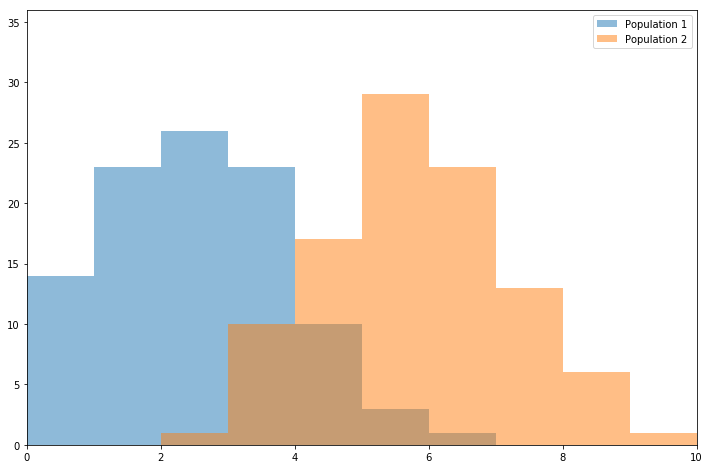

In [14]:
samples = samples_from_df(populations, 100) 
print_sample_stats(samples)
plts = two_binomial_hists(samples)

*For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

**Increase** the size of your samples from **100 to 1000**, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, **decreasing** the size of your samples to **20**. What values change, and what remain the same?*

The sample mean and standard devation are more likely to be closer to the population mean and standard devation as the sample size increases and less likely as the sample size decreases.  


for sample of pop1 : 
 >>> mean is 2.008
 >>> standard deviation is 1.2327
for sample of pop2 : 
 >>> mean is 4.963
 >>> standard deviation is 1.5938


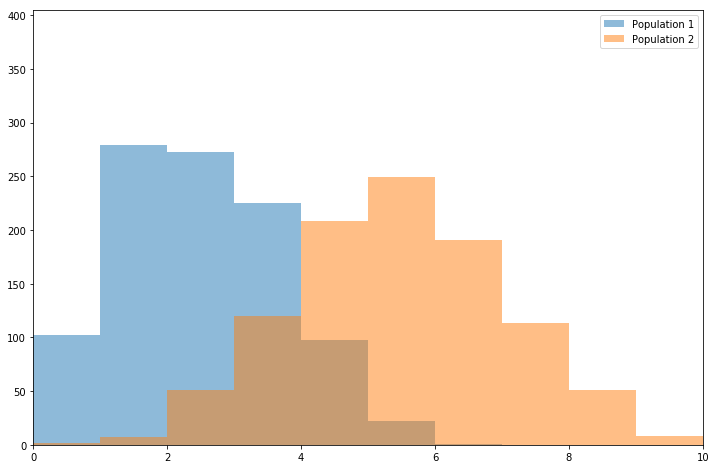

In [15]:
samples = samples_from_df(populations, 1000) 
print_sample_stats(samples)
plts = two_binomial_hists(samples)

for sample of pop1 : 
 >>> mean is 1.75
 >>> standard deviation is 1.4464
for sample of pop2 : 
 >>> mean is 5.0
 >>> standard deviation is 1.6859


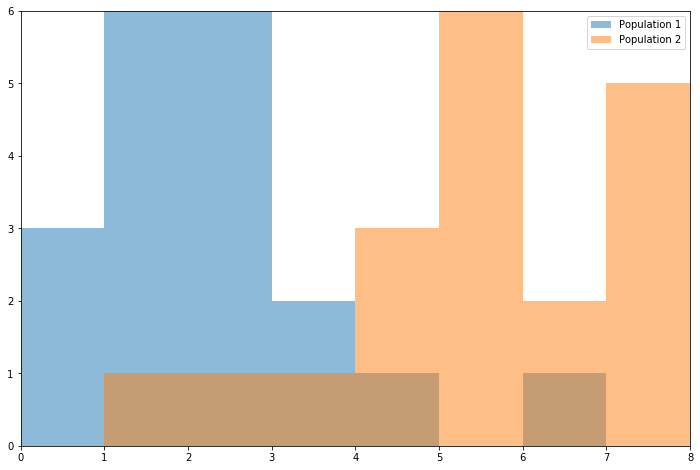

In [16]:
samples = samples_from_df(populations, 20) 
print_sample_stats(samples)
plts = two_binomial_hists(samples)


Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. 



In [17]:
from scipy.stats import ttest_ind

Ttest_indResult(statistic=-10.122474590949418, pvalue=1.2772670554074236e-19)


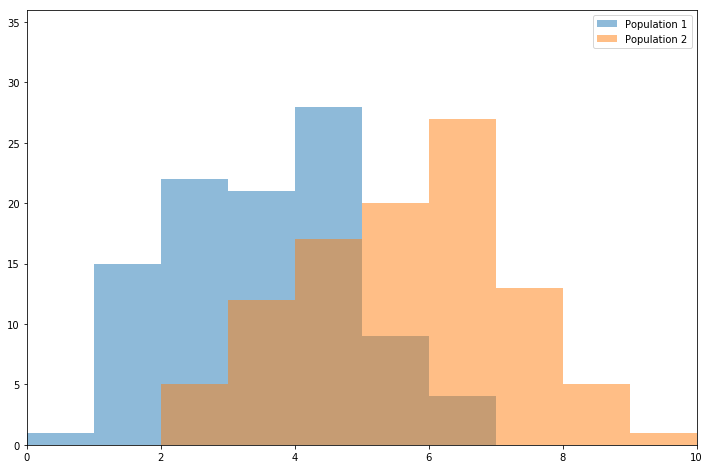

In [18]:
my_binomials = [{'name':'pop1', 'n':10, 'p':0.3, 'size':10000},
                {'name':'pop2', 'n':10, 'p':0.5, 'size':10000}
               ]
populations = binomial_pdf(my_binomials)
samples = samples_from_df(populations, 100) 
print(ttest_ind(samples['pop1'], samples['pop2'], equal_var=False))
plts = two_binomial_hists(samples)               


*Then change the probability value p for group 1 to **0.4**, and do it again. What changes, and why?*

There will be more overlap between the two histograms demonstrated by a reduction in the T statistic.

Ttest_indResult(statistic=-5.826428105426764, pvalue=2.263891696077081e-08)


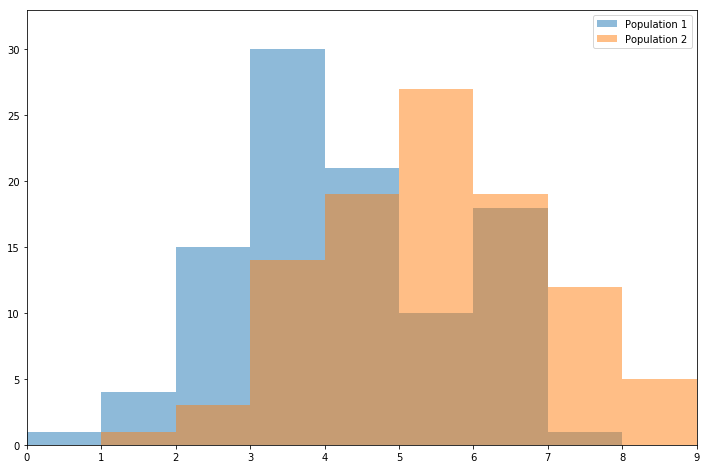

In [19]:
my_binomials = [{'name':'pop1', 'n':10, 'p':0.4, 'size':10000},
                {'name':'pop2', 'n':10, 'p':0.5, 'size':10000}
               ]
populations = binomial_pdf(my_binomials)
samples = samples_from_df(populations, 100) 
print(ttest_ind(samples['pop1'], samples['pop2'], equal_var=False))
plts = two_binomial_hists(samples) 

*Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?*

Initially tried with laplace, but my population means were not as expected.  Switched to gamma and the sample means do represent the populations well.  The gamma distributions may not be normal enough to utilize T statistic.  

In [20]:
my_gamma = [{'name':'pop1', 'shape':2.0, 'scale':2.0, 'size':10000},
            {'name':'pop2', 'shape':2.0, 'scale':3.0, 'size':10000}
             ]

In [21]:
populations  = gamma_pdf(my_gamma)
populations.describe()

,pop1,pop2
count,10000.000000,10000.000000
mean,3.966504,5.962448
std,2.765311,4.240194
min,0.008620,0.087675
25%,1.887732,2.843507
50%,3.367271,4.967198
75%,5.383493,8.075092
max,23.150991,32.217044


In [22]:
samples.describe()

,pop1,pop2
count,100.000000,100.000000
mean,3.730000,4.980000
std,1.509933,1.524083
min,0.000000,1.000000
25%,3.000000,4.000000
50%,3.500000,5.000000
75%,5.000000,6.000000
max,7.000000,8.000000


Ttest_indResult(statistic=-3.9884117114207616, pvalue=9.692424801381265e-05)


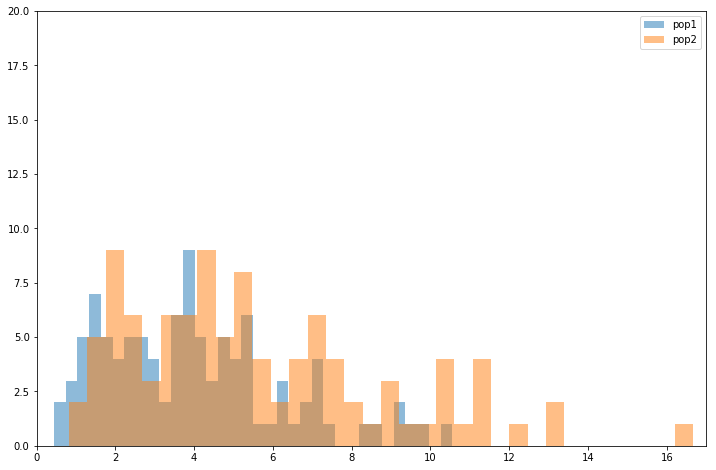

In [23]:
samples = samples_from_df(populations, 100) 
print(ttest_ind(samples['pop1'], samples['pop2'], equal_var=False))
plts = two_gamma_hists(samples) 

In [24]:
my_laplace = [{'name':'pop1', 'loc':1.0, 'scale':1.0, 'size':10000},
              {'name':'pop2', 'loc':3.0, 'scale':2.0, 'size':10000}
             ]

In [25]:
populations  = laplace_pdf(my_laplace)
populations.describe()

,pop1,pop2
count,10000.000000,10000.000000
mean,-0.001451,0.009408
std,1.424887,1.363717
min,-9.970361,-7.485090
25%,-0.721101,-0.655767
50%,-0.008322,0.001466
75%,0.705118,0.679144
max,11.018968,7.632775


for sample of pop1 : 
 >>> mean is 0.0253
 >>> standard deviation is 1.3766
for sample of pop2 : 
 >>> mean is 0.1333
 >>> standard deviation is 1.2407
Ttest_indResult(statistic=-0.5831703081538516, pvalue=0.5604493978142088)


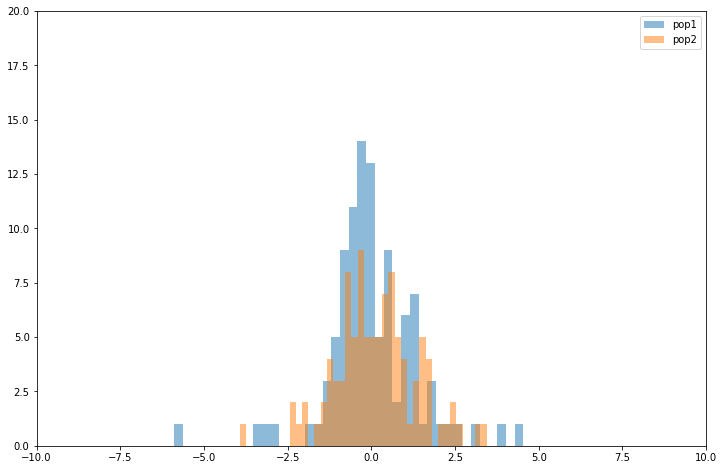

In [26]:
samples = samples_from_df(populations, 100)
print_sample_stats(samples)
print(ttest_ind(samples['pop1'], samples['pop2'], equal_var=False))
plts = two_laplace_hists(samples) 